# Demonstration of `Ground_Motion` class objects

This notebook demonstrates how to initialize objects of the `Ground_Motion` class, and the different functionalities of this class. The detailed documentation of this class is [here](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_ground_motion.html).

_This notebook takes about 20 minutes to read through._

## 1. Import relevant libraries

In [1]:
import numpy as np

In [2]:
from PySeismoSoil.class_ground_motion import Ground_Motion

## 2. Initialize a `Ground_Motion` object from a numpy array

In [3]:
data = np.array(
    [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], [1, 1, 2, 3, -1, -2, 0]]
).T

The numpy array should have two columns, with the 0th column the time steps (in seconds), and the 1st column the acceleration, velocity, or displacement.

In [4]:
data

array([[ 0.1,  1. ],
       [ 0.2,  1. ],
       [ 0.3,  2. ],
       [ 0.4,  3. ],
       [ 0.5, -1. ],
       [ 0.6, -2. ],
       [ 0.7,  0. ]])

#### Here is how to initialize a `Ground_Motion` object:

##### 2.1. Initialize as acceleration time history

In [5]:
ground_motion = Ground_Motion(data, unit='m/s/s')  # `unit` argument is mandatory

Use a different unit:

In [6]:
ground_motion = Ground_Motion(data, unit='gal')  # `unit` argument is mandatory

##### 2.2. Initialize as velocity time history

In [7]:
ground_motion = Ground_Motion(data, unit='m/s', motion_type='veloc')  # `motion_type` argument is optional

##### 2.3. Initialize as displacement time history

In [8]:
ground_motion = Ground_Motion(data, unit='cm', motion_type='displ')  # `motion_type` argument is optional

## 3. Initialize a `Ground_Motion` object from a text file

You can initialize a `Ground_Motion` object from a text file, provided that the file contains two columns of data. The column delimiter by default is "tab", and you can specify your own delimiter via the `sep` argument if needed:

In [9]:
ground_motion = Ground_Motion(
    '../tests/files/sample_accel.txt', unit='gal', sep='\t'
)

## 4. Retrieving data from a `Ground_Motion` object

You can retrieve acceleration, velocity, and displacement time histories as follows.

_(Note that the units that you obtain will be m/s/s, m/s, and m, regardless of what unit you use to initialize the object.)_

In [10]:
ground_motion.accel

array([[0.0000e+00, 1.7390e-04],
       [1.0000e-02, 3.9600e-05],
       [2.0000e-02, 1.7910e-04],
       ...,
       [4.4100e+01, 6.5651e-03],
       [4.4110e+01, 6.1363e-03],
       [4.4120e+01, 5.7948e-03]])

In [11]:
ground_motion.veloc

array([[0.00000e+00, 1.73900e-06],
       [1.00000e-02, 2.13500e-06],
       [2.00000e-02, 3.92600e-06],
       ...,
       [4.41000e+01, 8.52106e-04],
       [4.41100e+01, 9.13469e-04],
       [4.41200e+01, 9.71417e-04]])

In [12]:
ground_motion.displ

array([[ 0.00000000e+00,  1.73900000e-08],
       [ 1.00000000e-02,  3.87400000e-08],
       [ 2.00000000e-02,  7.80000000e-08],
       ...,
       [ 4.41000000e+01, -1.19258088e-01],
       [ 4.41100000e+01, -1.19248953e-01],
       [ 4.41200000e+01, -1.19239239e-01]])

## 5. View a `Ground_Motion` object

You can view the ground motion time history. Internally, the unit of the ground motion is stored as SI units.

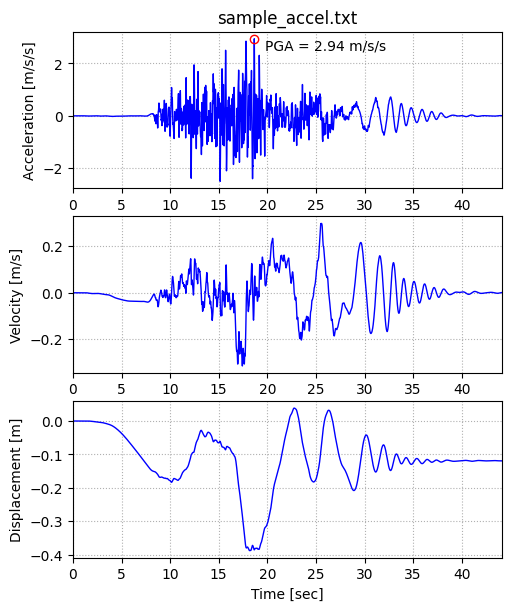

In [13]:
ground_motion.plot();

Printing the ground motion object shows some key characteristics of it:

In [14]:
print(ground_motion)

n_pts=4413, dt=0.01s, PGA=0.3g=294gal, PGV=31.5cm/s, PGD=38.8cm, T5_95=20.4s


## 6. Attributes of the `Ground_Motion` object

You can query different attributes of this ground motion. (For a full list of attributes, see the [documentation](https://PySeismoSoil.readthedocs.io/en/stable/api_docs/class_ground_motion.html) of `Ground_Motion`.)

In [15]:
ground_motion.pga_in_g

0.3

In [16]:
ground_motion.pga  # unit: m/s/s

2.943

In [17]:
ground_motion.pgv_in_cm_s

31.46187099999999

In [18]:
ground_motion.Arias_Intensity

array([[0.00000000e+00, 0.00000000e+00],
       [1.00000000e-02, 4.84228151e-11],
       [2.00000000e-02, 5.09337834e-11],
       ...,
       [4.41000000e+01, 1.52395535e+00],
       [4.41100000e+01, 1.52395541e+00],
       [4.41200000e+01, 1.52395548e+00]])

In [19]:
ground_motion.dt  # recording time interval, unit: sec

0.01

In [20]:
ground_motion.T5_95  # time duration from 5% Arias intensity to 95% Arias intensity (unit: sec)

20.45

## 7. Manipulating the `Ground_Motion` object

### 7.1. Fourier transform

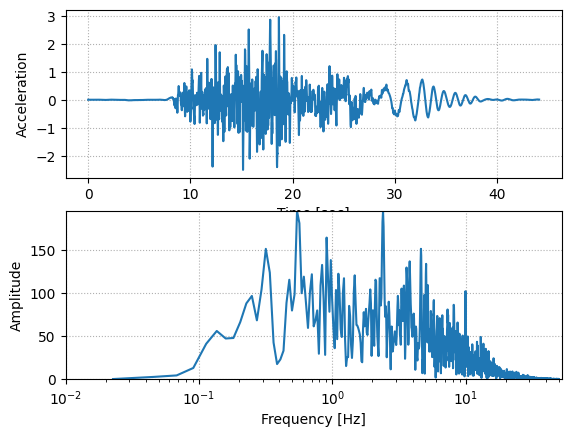

In [21]:
freq_spectrum = ground_motion.get_Fourier_spectrum(show_fig=True);

`freq_spectrum` is an object of `Frequency_Spectrum` class. The demo of that class is [here](./Demo_03_Frequency_Spectrum.ipynb). For detailed documentations, see [here](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_frequency_spectrum.html).

In [22]:
type(freq_spectrum)

PySeismoSoil.class_frequency_spectrum.Frequency_Spectrum

In [23]:
freq_spectrum

df = 0.02 Hz, n_pts = 2207, f_min = 0.02 Hz, f_max = 50.01 Hz

### 7.2. Response spectra

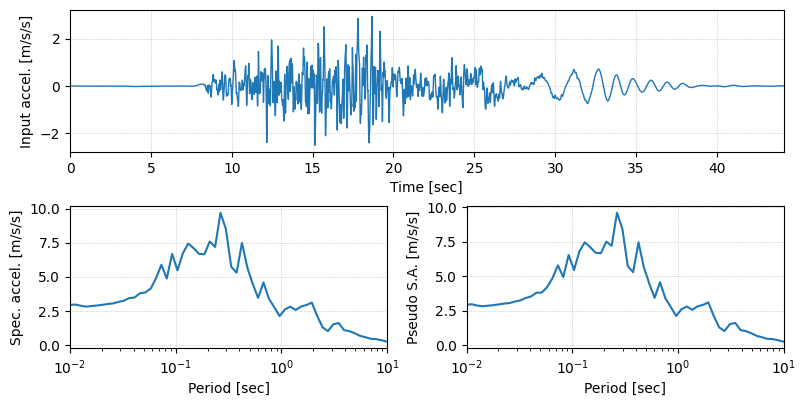

In [24]:
resp_spectra = ground_motion.get_response_spectra(show_fig=True);

### 7.3. Filtering

There are four filtering methods: `lowpass()`, `highpass()`, `bandpass()`, and `bandstop()`.

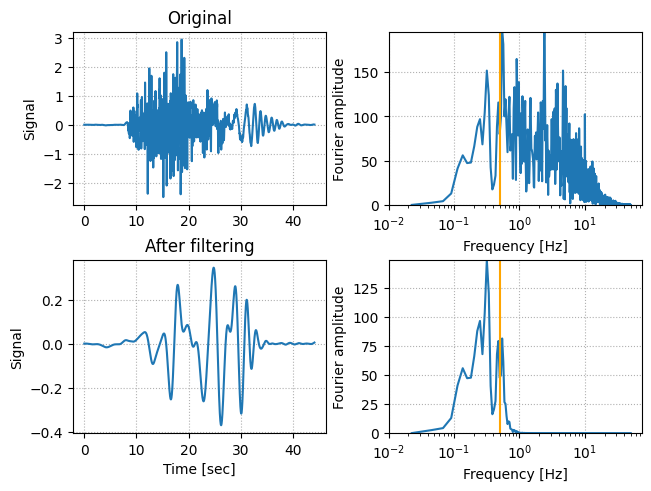

In [25]:
filtered = ground_motion.lowpass(0.5, show_fig=True)

In [26]:
type(filtered)

PySeismoSoil.class_ground_motion.Ground_Motion

### 7.4. Baseline correction

`baseline_correct()` method can correct static shifts in the ground motion.

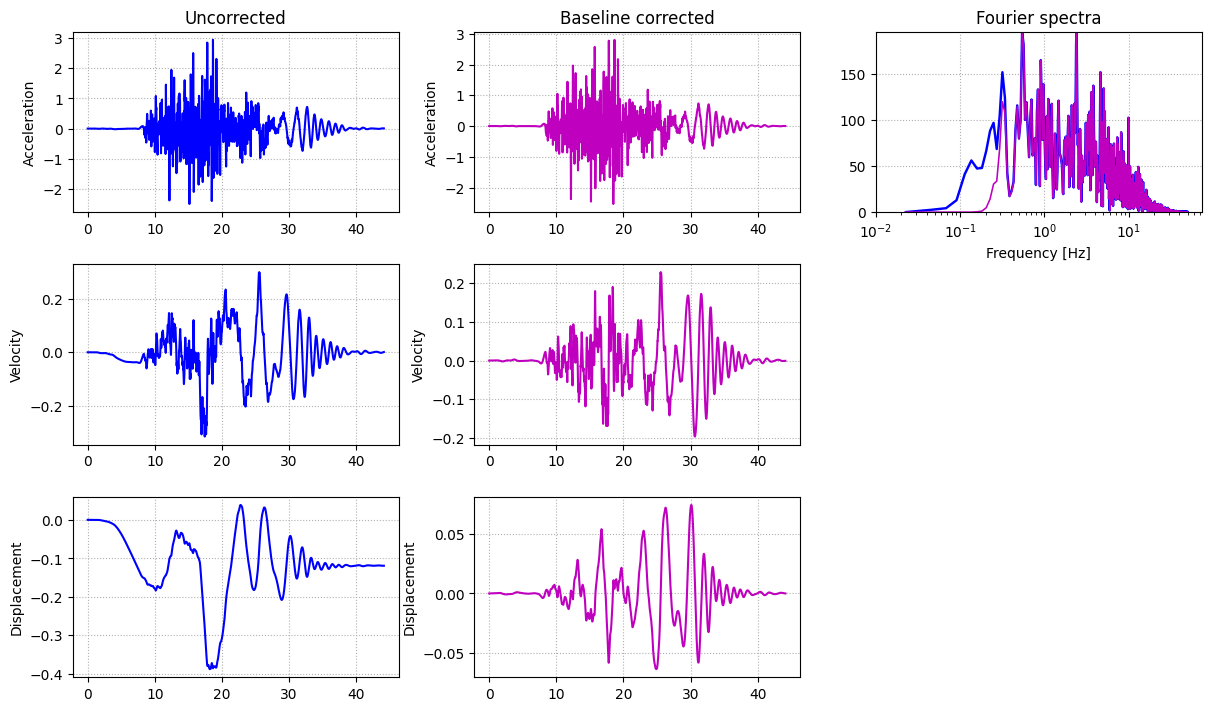

In [27]:
corrected = ground_motion.baseline_correct(cutoff_freq=0.25, show_fig=True);

In [28]:
type(corrected)

PySeismoSoil.class_ground_motion.Ground_Motion

### 7.5. Scale ground motion

Scale by a factor:

In [29]:
scaled_1 = ground_motion.scale_motion(factor=2.0)

In [30]:
ground_motion.pga

2.943

In [31]:
scaled_1.pga

5.886

Scale by a target PGA (in g):

In [32]:
scaled_2 = ground_motion.scale_motion(target_PGA_in_g=1.0)

In [33]:
ground_motion.pga_in_g

0.3

In [34]:
scaled_2.pga_in_g

1.0

### 7.6. Truncate ground motion

##### Truncate the head and tail of the time series to get rid of excess zeros.

Truncate signal points before 0.001% Arias intensity and beyond 99.999% Arias intensity:

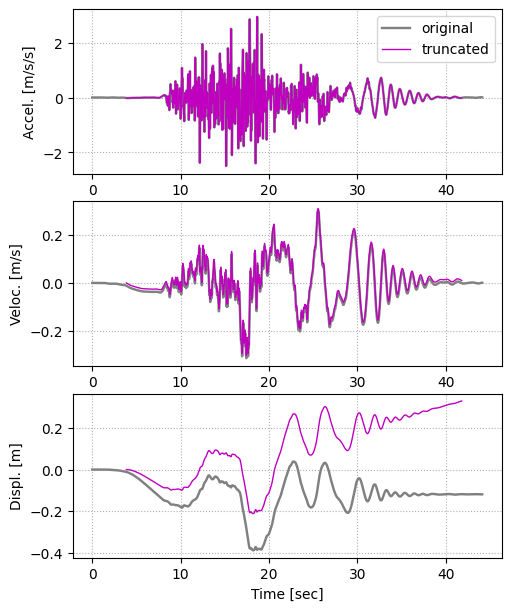

In [35]:
truncated = ground_motion.truncate(
    [0.00001, 0.99999], arias=True, show_fig=True
)

Truncate signal points before 5 seconds and after 30 seconds:

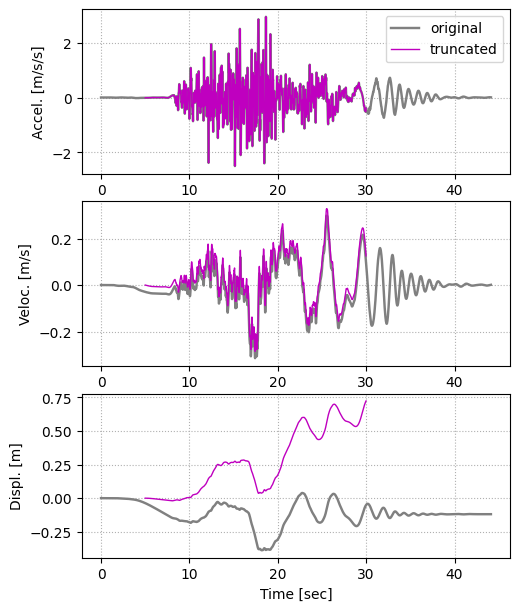

In [36]:
truncated = ground_motion.truncate([5.0, 30.0], arias=False, show_fig=True)

### 7.7. Amplify ground motions

#### 7.7.1. Amplify motions by specifying a transfer function

##### 7.7.1.1. Create a complex-valued transfer function **by hand**, and apply it to the ground motion:

In [37]:
from PySeismoSoil.class_frequency_spectrum import Frequency_Spectrum

In [38]:
df = 0.005
freq = np.arange(df, 50, step=df)
amplification = 2.76 * np.ones_like(freq)  # shaking is amplified by 2.76 times
phase_shift = -40.0 * freq  # also there is some delay
ampl_and_phase = amplification * np.exp(1j * phase_shift)

In [39]:
tf = Frequency_Spectrum(ampl_and_phase, df=df)

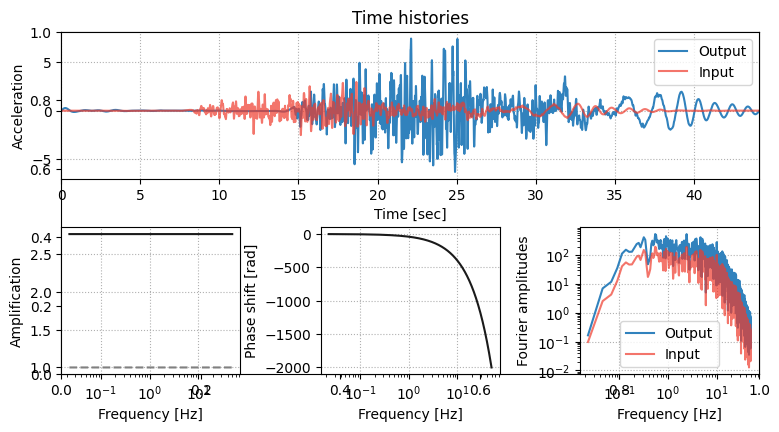

In [40]:
amplified_motion = ground_motion.amplify_by_tf(tf, show_fig=True)

##### 7.7.1.2. Obtain a complex-valued transfer function **from a soil profile**, and apply it to the ground motion.

In [41]:
from PySeismoSoil.class_Vs_profile import Vs_Profile

(For more information on the `Vs_Profile` class, see its its [documentations](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_Vs_profile.html) and [examples](./Demo_02_Vs_Profile.ipynb).)

In [42]:
vs_profile = Vs_Profile('../tests/files/profile_FKSH14.txt')
trans_func_rock_outcrop, _, _ = vs_profile.get_transfer_function()

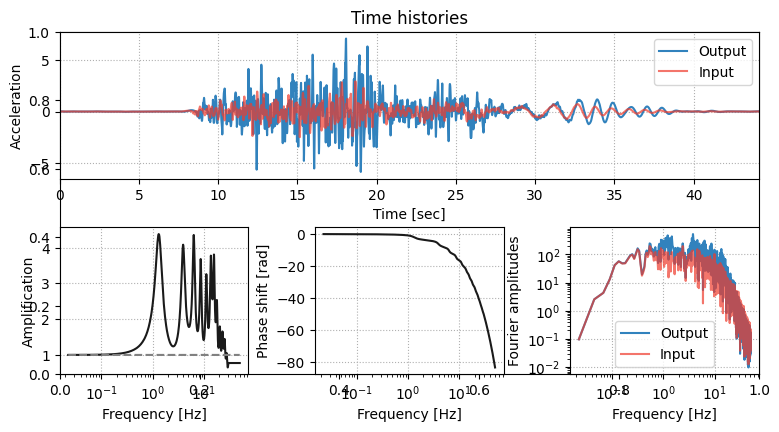

In [43]:
amplified_motion = ground_motion.amplify_by_tf(
    trans_func_rock_outcrop, show_fig=True
)

#### 7.7.2. Amplify motions by directly with a $V_S$ profile

Here is an easier way to amplify ground motions (by the linear site response method), if the users know the $V_S$ profile. The results are identical to those in Section 7.7.1.2.

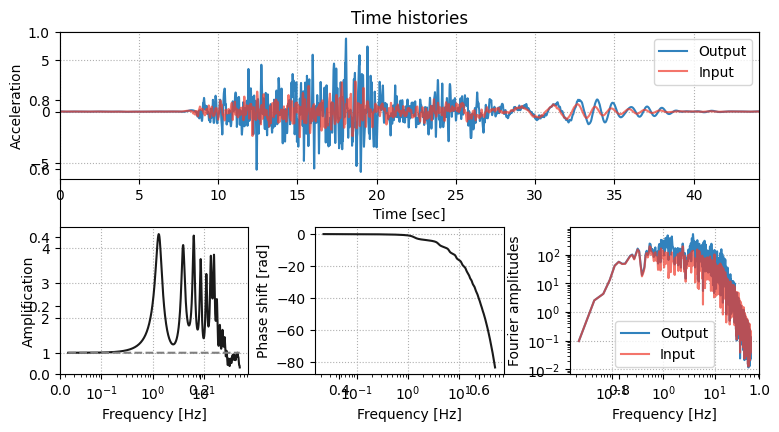

In [44]:
amplified_motion = ground_motion.amplify(vs_profile, show_fig=True)

### 7.8. Perform deconvolution of ground motion

Deconvolution is the process of back-calculating what the input motion would be (either on rock outcrop, or in a borehole), given the soil-surface motion and the soil profile.

In the two examples below, the output motions are weaker than the input motion, because they are motions in/on the rock.

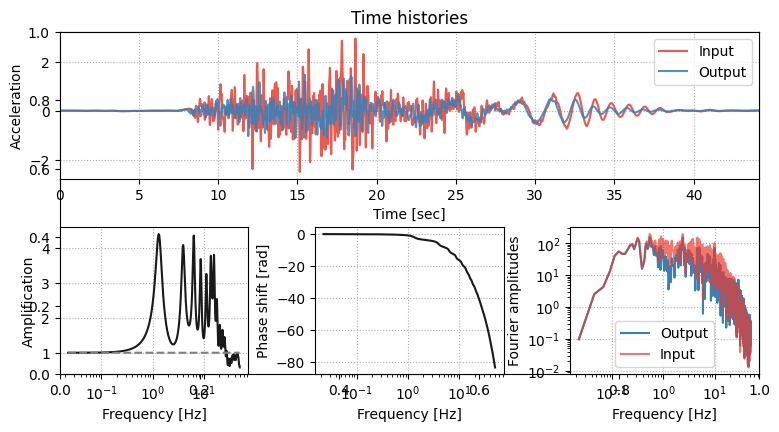

In [45]:
rock_outcrop_motion = ground_motion.deconvolve(
    vs_profile, boundary='elastic', show_fig=True
)

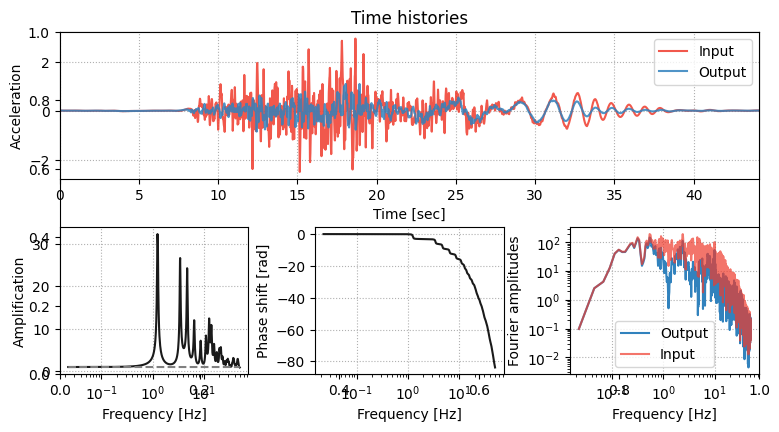

In [46]:
borehole_motion = ground_motion.deconvolve(
    vs_profile, boundary='rigid', show_fig=True
)

### 7.9. Compare with another ground motion

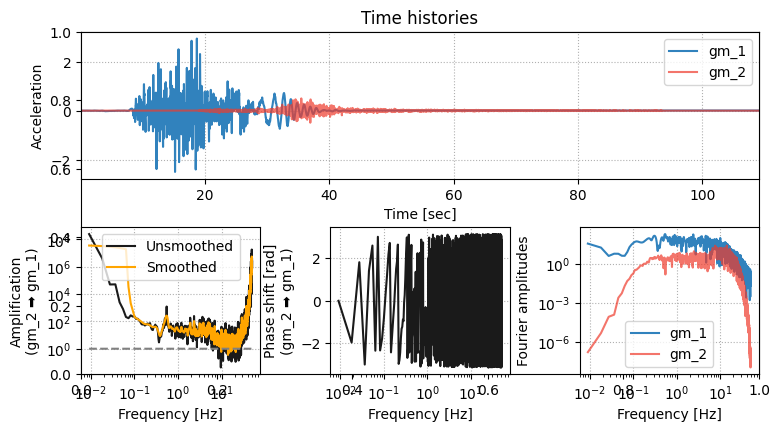

In [47]:
gm_1 = Ground_Motion('../tests/files/sample_accel.txt', unit='gal')
gm_2 = Ground_Motion(
    '../tests/files/Accel_02_weak_motion_(unit_gal).txt', unit='gal'
)
gm_1.compare(
    gm_2,
    this_ground_motion_as_input=False,
    smooth=True,
    input_accel_label='gm_2',
    output_accel_label='gm_1',
);